In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

In [49]:
n_pts = 500
centers = [[-1, 1], [-1, -1], [1, -1]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)

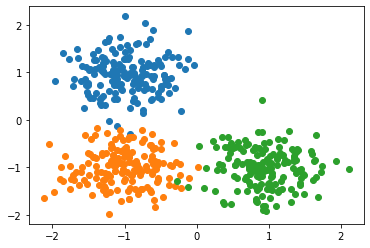

In [50]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])

In [51]:
# apply one hot encoding
y_cat = to_categorical(y, 3)
print(y_cat)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [52]:
model = Sequential()
model.add(Dense(units=3, input_shape=(2,), activation='softmax'))
model.compile(Adam(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

E:\Neural_Network\ANN\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [53]:
h = model.fit(x=X, y=y_cat, verbose=1, batch_size=50, epochs= 100, shuffle=True)

Epoch 1/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3424 - accuracy: 0.9680
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1198 - accuracy: 0.9880
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0756 - accuracy: 0.9880
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0592 - accuracy: 0.9880
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0531 - accuracy: 0.9880
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0483 - accuracy: 0.9880
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0456 - accuracy: 0.9880
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0434 - accuracy: 0.9880
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0417 - accuracy: 0.9880
Epoch 10/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0405 - accuracy: 0.9880
Epoch 11/

In [54]:
def plot_multiclass_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1)
    y_span = np.linspace(min(X[:,1]) - 1, max(X[:,1]) + 1)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = np.c_[xx.ravel(), yy.ravel()]
    pred_func = model.predict(grid)
    pred_func = np.argmax(pred_func, axis=1)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

Prediction is:  [[1.8318773e-10 4.0419495e-06 9.9999595e-01]]


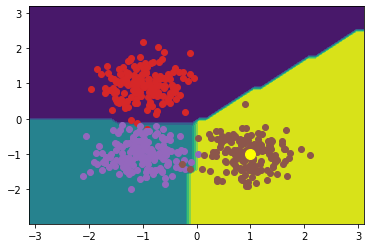

In [55]:
plot_multiclass_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])

plot_multiclass_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
 
x = 1
y = -1
 
point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="yellow")
print("Prediction is: ", prediction)